In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

**steps of Neighborhod based CF**:

1. Fill null values


2. Decide on a method to measure similarity between viewers/users


3. Apply that measure to all pairs of users


4. Find list of candidates for an active user (e.g. items the active users have not seen)


5. Use similarity measure to construct neighborhood for the active user (n users who are most similar)


6. Use a weighted average of ratings from neighbors to predict ratings for candidates for the active user


7. Order candidates descendingly according to predicted rating and take the top k as recommendations

In [4]:
initial = pd.read_csv("/Users/dina.deifallah/Downloads/garlic_boosting_ratings.csv", index_col=0)
initial = initial.T
initial

,Carmine,Alan,Caoimhe,Christoph,David,Dina,Felix,Florian,Hayri,Lijana,Marija,Mohammad,Noah,Philipp,Tiago,Viswa
Night on Earth,3.5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,5.0,2.5
Inside Out (Alles steht Kopf),4.0,NaN,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,3.5,NaN,NaN,5.0,3.0
Apocalypse Now,5.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,5.0,NaN,NaN,NaN,4.0
The Lord of the Rings,5.0,4.0,5.0,5.0,3.0,5.0,NaN,3.0,5.0,4.0,3.0,3.0,NaN,5.0,NaN,5.0
The Big Lebowski,3.0,5.0,5.0,3.0,5.0,NaN,5.0,3.0,NaN,4.0,4.0,NaN,NaN,4.0,1.0,NaN
The Great Beauty,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0
Avatar,5.0,3.0,2.0,NaN,3.0,4.0,NaN,3.0,5.0,NaN,2.0,3.0,NaN,3.0,NaN,5.0
Toy Story,NaN,3.0,4.0,4.0,2.0,4.0,1.0,3.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,4.0
Black Hawk down,NaN,4.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0
Titanic,2.5,3.0,3.0,3.0,2.0,5.0,3.0,4.0,5.0,4.0,2.0,5.0,NaN,2.0,5.0,5.0


In [5]:
# drop Noah

initial.drop(columns=['Noah'], inplace=True)

initial

,Carmine,Alan,Caoimhe,Christoph,David,Dina,Felix,Florian,Hayri,Lijana,Marija,Mohammad,Philipp,Tiago,Viswa
Night on Earth,3.5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,5.0,2.5
Inside Out (Alles steht Kopf),4.0,NaN,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,3.5,NaN,5.0,3.0
Apocalypse Now,5.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,5.0,NaN,NaN,4.0
The Lord of the Rings,5.0,4.0,5.0,5.0,3.0,5.0,NaN,3.0,5.0,4.0,3.0,3.0,5.0,NaN,5.0
The Big Lebowski,3.0,5.0,5.0,3.0,5.0,NaN,5.0,3.0,NaN,4.0,4.0,NaN,4.0,1.0,NaN
The Great Beauty,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0
Avatar,5.0,3.0,2.0,NaN,3.0,4.0,NaN,3.0,5.0,NaN,2.0,3.0,3.0,NaN,5.0
Toy Story,NaN,3.0,4.0,4.0,2.0,4.0,1.0,3.0,NaN,NaN,5.0,NaN,3.0,NaN,4.0
Black Hawk down,NaN,4.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,3.0
Titanic,2.5,3.0,3.0,3.0,2.0,5.0,3.0,4.0,5.0,4.0,2.0,5.0,2.0,5.0,5.0


#### How to fill the NaNs?

We can fill NaNs here by using 0 for missing data, this will work better than using user and movie averages, because it creates a wider range for the user similarity measure

In [31]:
user_item = initial.fillna(0)
user_item

,Carmine,Alan,Caoimhe,Christoph,David,Dina,Felix,Florian,Hayri,Lijana,Marija,Mohammad,Philipp,Tiago,Viswa
Night on Earth,3.5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,2.5
Inside Out (Alles steht Kopf),4.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,3.5,0.0,5.0,3.0
Apocalypse Now,5.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,5.0,0.0,0.0,4.0
The Lord of the Rings,5.0,4.0,5.0,5.0,3.0,5.0,0.0,3.0,5.0,4.0,3.0,3.0,5.0,0.0,5.0
The Big Lebowski,3.0,5.0,5.0,3.0,5.0,0.0,5.0,3.0,0.0,4.0,4.0,0.0,4.0,1.0,0.0
The Great Beauty,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
Avatar,5.0,3.0,2.0,0.0,3.0,4.0,0.0,3.0,5.0,0.0,2.0,3.0,3.0,0.0,5.0
Toy Story,0.0,3.0,4.0,4.0,2.0,4.0,1.0,3.0,0.0,0.0,5.0,0.0,3.0,0.0,4.0
Black Hawk down,0.0,4.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
Titanic,2.5,3.0,3.0,3.0,2.0,5.0,3.0,4.0,5.0,4.0,2.0,5.0,2.0,5.0,5.0


### Cosine Similarity
+ Angle measurement between two vectors. Orientation, not magnitude.
+ Values range between:
  
    -1: vectors point in opposite directions.
  
    +1: vectors are on top of each other.
    
     0: vectors are perpendicular. 

$$cos(X, Y) = \frac{\sum_i^n{x_i*y_i}}{\sqrt{\sum_i^n{x_i^2}}\sqrt{\sum_i^n{y_i^2}}}$$

Numerator: dot product of the vectors

Denominator: Euclidean norm of the vectors multiplied

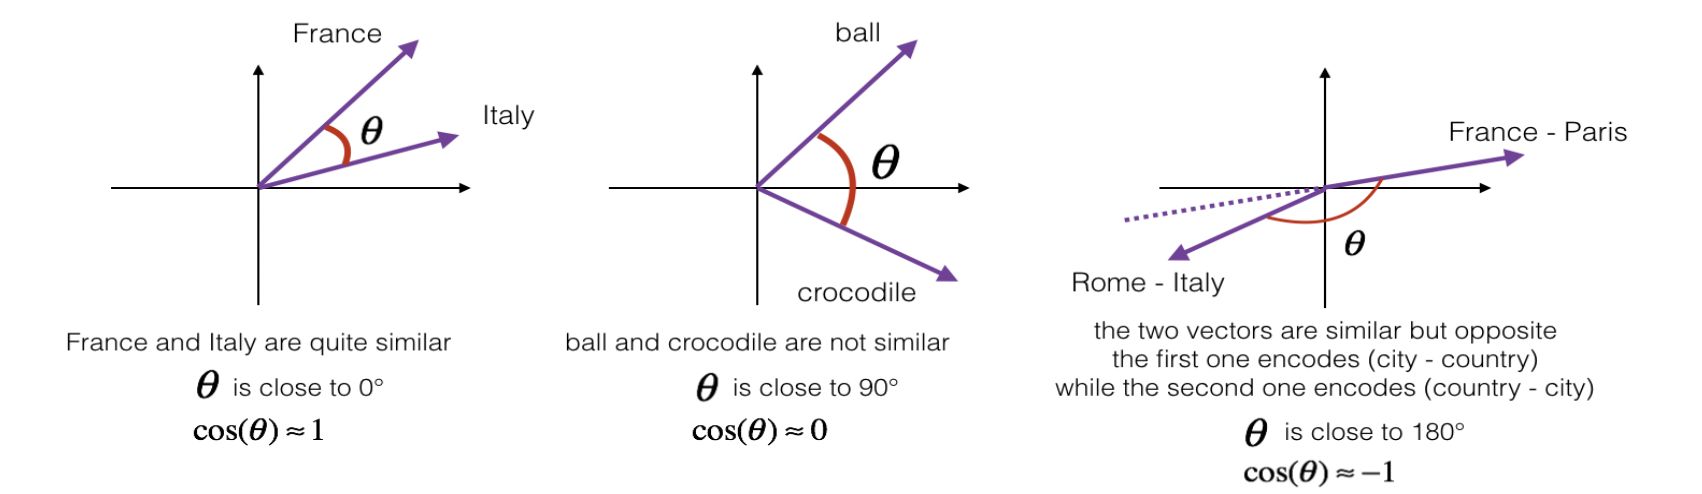

### other similarity measures for CF:

- **Euclidean Distance** 


- **Pearson Correlation Coefficient**


- **Jaccard Coefficient**

#### Calculate Cosine-similarities between users

In [32]:
# define the function that calculates the above equation

def cos_sim(vec_one, vec_two):
    num = np.dot(vec_one, vec_two)
    denom = np.sqrt(np.dot(vec_one, vec_one)) * np.sqrt(np.dot(vec_two, vec_two))
    return round(num/denom, 2)

In [34]:
# small test for the function

vec_one = [2,3,1]
vec_two = [3,4,5]

sim_score = cos_sim(vec_one, vec_two)

sim_score

0.87

In [36]:
# let's try it on the data

#vec_one, vec_two = [user_item["Dina"], user_item["Tiago"]]
vec_one, vec_two = [user_item["Dina"], user_item["Carmine"]]

sim_score = cos_sim(vec_one, vec_two)

sim_score

0.58

In [37]:
# create a dataframe for the cosine similarity score for each pair of users of size 15x15

def user_user_matrix(df):
    total_fillable = list()
    for user in df.columns:
        fillable = list()
        for other_user in df.columns:
            sim_score = cos_sim(df[user], df[other_user])
            fillable.append(sim_score)
        
        total_fillable.append(fillable)

    return pd.DataFrame(total_fillable, columns = df.columns, index = df.columns)

#### Create a table with pairwise cosine-similarities

In [38]:
user_user = user_user_matrix(user_item)
user_user

,Carmine,Alan,Caoimhe,Christoph,David,Dina,Felix,Florian,Hayri,Lijana,Marija,Mohammad,Philipp,Tiago,Viswa
Carmine,1.00,0.49,0.63,0.44,0.64,0.58,0.37,0.52,0.52,0.54,0.61,0.64,0.49,0.53,0.76
Alan,0.49,1.00,0.63,0.68,0.66,0.64,0.49,0.94,0.67,0.83,0.45,0.74,0.77,0.18,0.76
Caoimhe,0.63,0.63,1.00,0.65,0.95,0.85,0.37,0.58,0.59,0.64,0.74,0.51,0.80,0.44,0.65
Christoph,0.44,0.68,0.65,1.00,0.54,0.56,0.49,0.70,0.64,0.72,0.46,0.49,0.86,0.22,0.67
David,0.64,0.66,0.95,0.54,1.00,0.83,0.38,0.56,0.62,0.64,0.67,0.57,0.75,0.43,0.67
Dina,0.58,0.64,0.85,0.56,0.83,1.00,0.18,0.65,0.75,0.57,0.58,0.69,0.69,0.44,0.82
Felix,0.37,0.49,0.37,0.49,0.38,0.18,1.00,0.51,0.36,0.55,0.61,0.54,0.49,0.58,0.39
Florian,0.52,0.94,0.58,0.70,0.56,0.65,0.51,1.00,0.70,0.80,0.45,0.77,0.76,0.25,0.78
Hayri,0.52,0.67,0.59,0.64,0.62,0.75,0.36,0.70,1.00,0.76,0.28,0.75,0.79,0.24,0.80
Lijana,0.54,0.83,0.64,0.72,0.64,0.57,0.55,0.80,0.76,1.00,0.33,0.75,0.79,0.26,0.70


#### In Sklearn

In [39]:
# We can create the "user_user"-matrix (including the similarities between users) using sklearn

user_user_sklearn = cosine_similarity(user_item.T)
user_user_sklearn = pd.DataFrame(user_user_sklearn, columns = user_item.columns, index = user_item.columns).round(2)

In [40]:
user_user_sklearn

,Carmine,Alan,Caoimhe,Christoph,David,Dina,Felix,Florian,Hayri,Lijana,Marija,Mohammad,Philipp,Tiago,Viswa
Carmine,1.00,0.49,0.63,0.44,0.64,0.58,0.37,0.52,0.52,0.54,0.61,0.64,0.49,0.53,0.76
Alan,0.49,1.00,0.63,0.68,0.66,0.64,0.49,0.94,0.67,0.83,0.45,0.74,0.77,0.18,0.76
Caoimhe,0.63,0.63,1.00,0.65,0.95,0.85,0.37,0.58,0.59,0.64,0.74,0.51,0.80,0.44,0.65
Christoph,0.44,0.68,0.65,1.00,0.54,0.56,0.49,0.70,0.64,0.72,0.46,0.49,0.86,0.22,0.67
David,0.64,0.66,0.95,0.54,1.00,0.83,0.38,0.56,0.62,0.64,0.67,0.57,0.75,0.43,0.67
Dina,0.58,0.64,0.85,0.56,0.83,1.00,0.18,0.65,0.75,0.57,0.58,0.69,0.69,0.44,0.82
Felix,0.37,0.49,0.37,0.49,0.38,0.18,1.00,0.51,0.36,0.55,0.61,0.54,0.49,0.58,0.39
Florian,0.52,0.94,0.58,0.70,0.56,0.65,0.51,1.00,0.70,0.80,0.45,0.77,0.76,0.25,0.78
Hayri,0.52,0.67,0.59,0.64,0.62,0.75,0.36,0.70,1.00,0.76,0.28,0.75,0.79,0.24,0.80
Lijana,0.54,0.83,0.64,0.72,0.64,0.57,0.55,0.80,0.76,1.00,0.33,0.75,0.79,0.26,0.70


In [42]:
# a small test to check that the matrix values are equal if we switch the index

assert user_user.iloc[1,4] == user_user_sklearn.iloc[1,4]

### With this matrix, we can create recommendations:

+ create a list of unseen movies of the active user (i.e. candidates list)


+ for each unseen movie: check who has rated it and who is closest to the active user, then predict the rating based on the (weighted) average ratings of the neighbours (the number of neighbors to include is a hyperparameter)


+ sort and select top recommendations

(This can all be done with merely writing for-loops and comparing values)

In [43]:
# Step 1: Choose an active user
active_user = "Dina"

In [45]:
items = initial.index

items

Index(['Night on Earth', 'Inside Out (Alles steht Kopf)', 'Apocalypse Now',
       'The Lord of the Rings', 'The Big Lebowski', 'The Great Beauty',
       'Avatar', 'Toy Story', 'Black Hawk down', 'Titanic',
       'Guardians of the Galaxy', 'Kill Bill', 'Top Gun',
       'Catch me if you can'],
      dtype='object')

In [46]:
# Step 2: Create a list of unseen movies for the active user

# notice that I am using the initial matrix with the NAs to locate unseen movies for a user

candidates = initial[initial[active_user].isna()].index
candidates

Index(['Night on Earth', 'Apocalypse Now', 'The Big Lebowski',
       'The Great Beauty', 'Catch me if you can'],
      dtype='object')

In [47]:
# Step 3: Create a list of top 5 similar user, i.e. neighbors

neighbors = user_user[active_user].sort_values(ascending= False).index[1:6]
neighbors

Index(['Caoimhe', 'David', 'Viswa', 'Hayri', 'Mohammad'], dtype='object')

In [49]:
# Step 4: For each unseen movie check who rated it among the neighbors

for item in candidates:
    # extract users who have rated unseen movies
    other_users = initial.columns[~initial.loc[item].isna()]
    # we want to create an intersection, so we save the users as a set-object
    other_users = set(other_users)
    print(other_users)

{'Viswa', 'Carmine', 'Marija', 'Tiago', 'Felix', 'Mohammad'}
{'Viswa', 'Carmine', 'Alan', 'Mohammad', 'Lijana', 'Florian'}
{'Carmine', 'Marija', 'Tiago', 'Alan', 'David', 'Philipp', 'Caoimhe', 'Felix', 'Christoph', 'Lijana', 'Florian'}
{'Viswa', 'Carmine', 'Tiago', 'Christoph'}
{'Viswa', 'Alan', 'Philipp', 'Felix', 'Christoph', 'Hayri', 'Mohammad', 'Lijana', 'Florian'}


In [53]:
# Step 5: Create ratings for the active user
# predict the rating based on the (weighted) average ratings of neighbors
# predicted_rating = sum(ratings*similarity)/sum(similarities)

for item in candidates:
    #extract users who have rated unseen movies
    other_users = initial.columns[~initial.loc[item].isna()]
    # we want to create an intersection, so we save the users as a set-object
    other_users = set(other_users)

    num = 0
    den = 0
    
    for neighbor in set(neighbors).intersection(other_users): 
        ratings = user_item[neighbor][item] 
        sim_score = user_user[active_user][neighbor]
        num = num + (ratings*sim_score)
        den = den + sim_score + 0.000001
    
    pred_ratings = num/den
    print(item, pred_ratings)

Night on Earth 3.642379281616846
Apocalypse Now 4.456947739142067
The Big Lebowski 4.999994047626133
The Great Beauty 4.99999390244646
Catch me if you can 4.637161986068159


### Advantages of Neighbourhood Bases approaches
+ fast
+ works for huge datasets
+ no domain knowledge necessary

### Disadvantages
+ Hard to include other data than ratings
+ sparsity

#### Datasets for recommender systems:
https://github.com/caserec/Datasets-for-Recommender-Systems